In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# seed for reported results
np.random.seed(157)

## Computer Simulation

We use the following three factors to model the percent of EV car sales in the U.S: Price (P), Charging Stations (C) and Range (R). We write the following model:


$$\mathrm{Rating} = w_p \cdot f_p(P) + w_c \cdot f_c(C) + w_r \cdot f_r(R)$$

**Rating**: We interpret a rating as the probability that a particular person would buy an EV over a regular car, and take the average of these to get a prediction for proportion of EVs bought.

**weights**: Each person has a different set of preferences, $w_p$, $w_c$ and $w_r$. We sample these as:
* $w_p \sim N(0.6, 0.1)$
* $w_c \sim N(0.5, 0.1)$
* $w_r \sim N(0.2, 0.05)$

**f**: this is a function that scores each factor between 0 and 1.

In [3]:
def f_p(P):
    return 1 - 1 / (1 + np.exp(-6 * (P - 1)))

def f_c(C):
    x = 1 * (10 ** -6) * C
    return np.clip(x, 0, 1)

def f_r(R):
    x = 0.04 * np.sqrt(np.clip(R - 100, a_min=0, a_max=None))
    return np.clip(x, 0, 1)

In [4]:
def sample_weights(n=1):
    w_p = np.random.normal(loc=0.6, scale=0.1, size=n)
    w_c = np.random.normal(loc=0.5, scale=0.1, size=n)
    w_r = np.random.normal(loc=0.2, scale=0.05, size=n)
    w_p, w_c, w_r = np.vstack([w_p, w_c, w_r]) / np.sum([w_p, w_c, w_r], axis=0)
    return w_p, w_c, w_r

In [5]:
def sample_P(n=1):
    return np.random.normal(loc=0.95, scale=0.2, size=n)
    
def sample_C(n=1):
    return np.random.normal(loc=300000, scale=75000, size=n)
    
def sample_R(n=1):
    return np.random.normal(loc=400, scale=70, size=n)

In [6]:
def sample_rating(n):
    w_p, w_c, w_r = sample_weights(n)
    P, C, R = sample_P(n), sample_C(n), sample_R(n)
    return w_p * f_p(P) + w_c * f_c(C) + w_r * f_r(R)

In [7]:
num_samples = 100000
ratings = sample_rating(num_samples)
print(f"Average: {np.mean(ratings)}")
print(f"Median: {np.median(ratings)}")
print(f"10% percentile: {np.percentile(ratings, 10)}")
print(f"90% percentile: {np.percentile(ratings, 90)}")

Average: 0.47941876181462917
Median: 0.4845347286959262
10% percentile: 0.3219572614379863
90% percentile: 0.6276930699784266


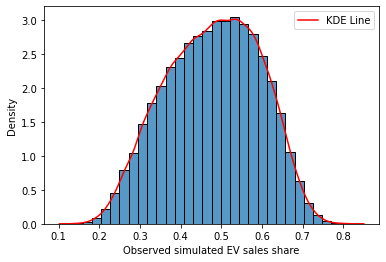

In [8]:
sns.histplot(ratings, bins=30, stat='density')
sns.kdeplot(ratings, color='red', label="KDE Line")
plt.xlabel("Observed simulated EV sales share")
plt.legend()
plt.show()

## Scoring Functions Visualization

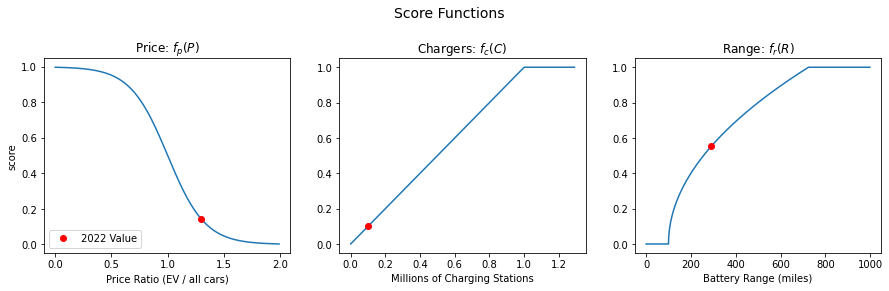

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

px = np.arange(0, 2, 0.01)
ax[0].plot(px, f_p(px))
ax[0].plot(1.3, f_p(1.3), c='r', marker='o', linestyle="None", label="2022 Value")
ax[0].set_title(r"Price: $f_p(P)$")
ax[0].set_xlabel("Price Ratio (EV / all cars)")
ax[0].set_ylabel("score")

cx = np.arange(0, 1.3, 0.01)
ax[1].plot(cx, f_c(cx * 1e6))
ax[1].plot(0.1, f_c(100000), c='r', marker='o')
ax[1].set_title(r"Chargers: $f_c(C)$")
ax[1].set_xlabel("Millions of Charging Stations")

rx = np.arange(0, 1000, 1)
ax[2].plot(rx, f_r(rx))
ax[2].plot(291, f_r(291), c='r', marker='o')
ax[2].set_title(r"Range: $f_r(R)$")
ax[2].set_xlabel("Battery Range (miles)")

fig.suptitle("Score Functions", fontsize=14)
fig.subplots_adjust(top=0.8)

ax[0].legend(loc='lower left')
plt.show()